In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Dropout,
    Flatten, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
)


2025-12-16 15:19:47.934026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765898388.177426      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765898388.246701      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
BASE_DIR = "/kaggle/input/fer2013plus/fer2013plus/fer2013"

TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR  = os.path.join(BASE_DIR, "test")

print(TRAIN_DIR)

IMG_SIZE = 48
BATCH_SIZE = 64
NUM_CLASSES = 8

/kaggle/input/fer2013plus/fer2013plus/fer2013/train


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 28386 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.


In [5]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), padding="same", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Fully Connected
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(NUM_CLASSES, activation="softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1765618770.526453      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765618770.527049      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,734,088 (10.43 MB)

 Trainable params: 2,732,680 (10.42 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3),
    ModelCheckpoint(
        "emotion_cnn_best.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=40,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


I0000 00:00:1765618795.010812     122 service.cc:148] XLA service 0x794a8c008680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765618795.011733     122 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765618795.011777     122 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765618795.514596     122 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/444 ━━━━━━━━━━━━━━━━━━━━ 1:09:40 9s/step - accuracy: 0.1094 - loss: 3.4119

I0000 00:00:1765618801.067291     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.1969 - loss: 2.7564

444/444 ━━━━━━━━━━━━━━━━━━━━ 224s 485ms/step - accuracy: 0.1970 - loss: 2.7558 - val_accuracy: 0.3777 - val_loss: 1.7427 - learning_rate: 1.0000e-04
Epoch 2/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 48s 109ms/step - accuracy: 0.3086 - loss: 2.1127 - val_accuracy: 0.3505 - val_loss: 2.0344 - learning_rate: 1.0000e-04
Epoch 3/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3702 - loss: 1.8870

444/444 ━━━━━━━━━━━━━━━━━━━━ 65s 146ms/step - accuracy: 0.3702 - loss: 1.8869 - val_accuracy: 0.3923 - val_loss: 1.7550 - learning_rate: 1.0000e-04
Epoch 4/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.3994 - loss: 1.7330 - val_accuracy: 0.3778 - val_loss: 1.7757 - learning_rate: 1.0000e-04
Epoch 5/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4231 - loss: 1.6283

444/444 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step - accuracy: 0.4231 - loss: 1.6283 - val_accuracy: 0.3932 - val_loss: 1.7039 - learning_rate: 5.0000e-05
Epoch 6/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4398 - loss: 1.5859

444/444 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.4398 - loss: 1.5859 - val_accuracy: 0.4165 - val_loss: 1.6778 - learning_rate: 5.0000e-05
Epoch 7/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4533 - loss: 1.5411

444/444 ━━━━━━━━━━━━━━━━━━━━ 64s 144ms/step - accuracy: 0.4533 - loss: 1.5411 - val_accuracy: 0.4416 - val_loss: 1.5458 - learning_rate: 5.0000e-05
Epoch 8/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4564 - loss: 1.5132

444/444 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.4564 - loss: 1.5131 - val_accuracy: 0.4536 - val_loss: 1.5265 - learning_rate: 5.0000e-05
Epoch 9/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 63s 141ms/step - accuracy: 0.4714 - loss: 1.4732 - val_accuracy: 0.4522 - val_loss: 1.5197 - learning_rate: 5.0000e-05
Epoch 10/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.4841 - loss: 1.4458

444/444 ━━━━━━━━━━━━━━━━━━━━ 79s 179ms/step - accuracy: 0.4841 - loss: 1.4458 - val_accuracy: 0.4716 - val_loss: 1.4907 - learning_rate: 5.0000e-05
Epoch 11/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step - accuracy: 0.4901 - loss: 1.4033 - val_accuracy: 0.4612 - val_loss: 1.4857 - learning_rate: 5.0000e-05
Epoch 12/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5051 - loss: 1.3928

444/444 ━━━━━━━━━━━━━━━━━━━━ 53s 120ms/step - accuracy: 0.5051 - loss: 1.3928 - val_accuracy: 0.5130 - val_loss: 1.3319 - learning_rate: 5.0000e-05
Epoch 13/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 57s 129ms/step - accuracy: 0.5039 - loss: 1.3799 - val_accuracy: 0.5071 - val_loss: 1.3625 - learning_rate: 5.0000e-05
Epoch 14/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5090 - loss: 1.3581

444/444 ━━━━━━━━━━━━━━━━━━━━ 51s 115ms/step - accuracy: 0.5090 - loss: 1.3581 - val_accuracy: 0.5225 - val_loss: 1.3272 - learning_rate: 5.0000e-05
Epoch 15/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 67s 150ms/step - accuracy: 0.5158 - loss: 1.3232 - val_accuracy: 0.5143 - val_loss: 1.3702 - learning_rate: 5.0000e-05
Epoch 16/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5279 - loss: 1.3174

444/444 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.5279 - loss: 1.3174 - val_accuracy: 0.5559 - val_loss: 1.2468 - learning_rate: 5.0000e-05
Epoch 17/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 51s 114ms/step - accuracy: 0.5275 - loss: 1.3038 - val_accuracy: 0.5027 - val_loss: 1.3843 - learning_rate: 5.0000e-05
Epoch 18/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5382 - loss: 1.2834

444/444 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.5382 - loss: 1.2834 - val_accuracy: 0.5670 - val_loss: 1.2334 - learning_rate: 5.0000e-05
Epoch 19/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 92s 208ms/step - accuracy: 0.5391 - loss: 1.2705 - val_accuracy: 0.5537 - val_loss: 1.2540 - learning_rate: 5.0000e-05
Epoch 20/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5426 - loss: 1.2665

444/444 ━━━━━━━━━━━━━━━━━━━━ 63s 141ms/step - accuracy: 0.5426 - loss: 1.2665 - val_accuracy: 0.5875 - val_loss: 1.1448 - learning_rate: 5.0000e-05
Epoch 21/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - accuracy: 0.5477 - loss: 1.2403 - val_accuracy: 0.5663 - val_loss: 1.2174 - learning_rate: 5.0000e-05
Epoch 22/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - accuracy: 0.5454 - loss: 1.2486 - val_accuracy: 0.5690 - val_loss: 1.2083 - learning_rate: 5.0000e-05
Epoch 23/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 51s 114ms/step - accuracy: 0.5570 - loss: 1.2237 - val_accuracy: 0.5853 - val_loss: 1.1697 - learning_rate: 5.0000e-05
Epoch 24/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5569 - loss: 1.2250

444/444 ━━━━━━━━━━━━━━━━━━━━ 48s 108ms/step - accuracy: 0.5569 - loss: 1.2250 - val_accuracy: 0.5987 - val_loss: 1.1139 - learning_rate: 2.5000e-05
Epoch 25/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.5649 - loss: 1.2074 - val_accuracy: 0.5975 - val_loss: 1.1427 - learning_rate: 2.5000e-05
Epoch 26/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 47s 105ms/step - accuracy: 0.5708 - loss: 1.1956 - val_accuracy: 0.5946 - val_loss: 1.1438 - learning_rate: 2.5000e-05
Epoch 27/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5682 - loss: 1.1989

444/444 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.5682 - loss: 1.1989 - val_accuracy: 0.6171 - val_loss: 1.0899 - learning_rate: 2.5000e-05
Epoch 28/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5762 - loss: 1.1856

444/444 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.5762 - loss: 1.1856 - val_accuracy: 0.6333 - val_loss: 1.0326 - learning_rate: 2.5000e-05
Epoch 29/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 92s 206ms/step - accuracy: 0.5645 - loss: 1.1966 - val_accuracy: 0.6145 - val_loss: 1.0759 - learning_rate: 2.5000e-05
Epoch 30/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 54s 121ms/step - accuracy: 0.5759 - loss: 1.1677 - val_accuracy: 0.6284 - val_loss: 1.0345 - learning_rate: 2.5000e-05
Epoch 31/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - accuracy: 0.5756 - loss: 1.1683 - val_accuracy: 0.6171 - val_loss: 1.0668 - learning_rate: 2.5000e-05
Epoch 32/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.5758 - loss: 1.1729 - val_accuracy: 0.6104 - val_loss: 1.0972 - learning_rate: 1.2500e-05
Epoch 33/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.5729 - loss: 1.1801 - val_accuracy: 0.6222 - val_loss: 1.0548 - learning_rate: 1.2500e-05
Epoch 34/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/st

444/444 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.5825 - loss: 1.1537 - val_accuracy: 0.6339 - val_loss: 1.0292 - learning_rate: 1.2500e-05
Epoch 35/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 49s 109ms/step - accuracy: 0.5869 - loss: 1.1508 - val_accuracy: 0.6256 - val_loss: 1.0466 - learning_rate: 1.2500e-05
Epoch 36/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 51s 114ms/step - accuracy: 0.5788 - loss: 1.1604 - val_accuracy: 0.6285 - val_loss: 1.0377 - learning_rate: 1.2500e-05
Epoch 37/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.5818 - loss: 1.1485 - val_accuracy: 0.6304 - val_loss: 1.0419 - learning_rate: 1.2500e-05
Epoch 38/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 62s 140ms/step - accuracy: 0.5857 - loss: 1.1582 - val_accuracy: 0.6259 - val_loss: 1.0501 - learning_rate: 6.2500e-06
Epoch 39/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 116s 262ms/step - accuracy: 0.5825 - loss: 1.1557 - val_accuracy: 0.6287 - val_loss: 1.0388 - learning_rate: 6.2500e-06
Epoch 40/40
444/444 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/

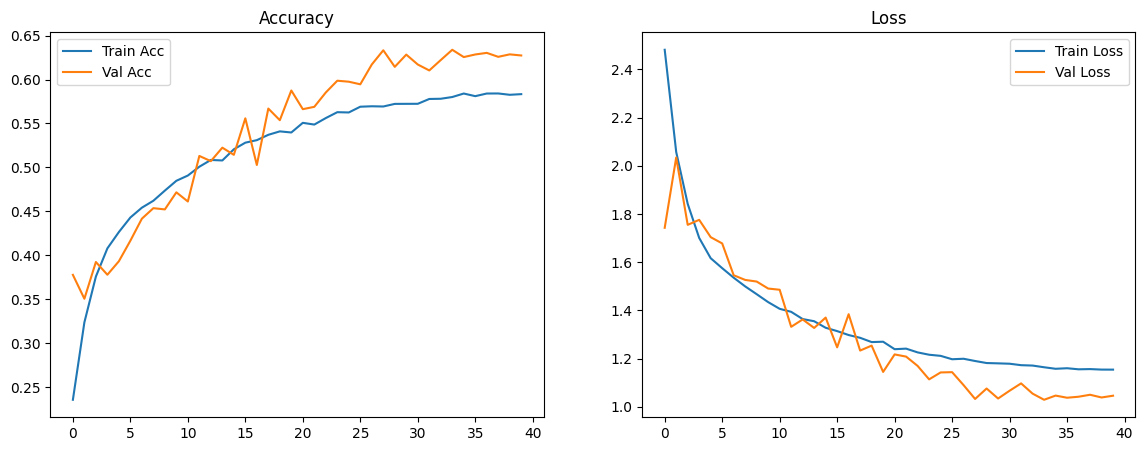

In [12]:
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.6003 - loss: 1.1342
Test Accuracy: 0.6339


# Extra-------------

In [15]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

print("Class Labels:")
for i, name in enumerate(class_names):
    print(i, name)

Class Labels:
0 anger
1 contempt
2 disgust
3 fear
4 happiness
5 neutral
6 sadness
7 surprise


In [16]:
# Reset generator to avoid index issues
test_generator.reset()

# Predict probabilities
y_pred_probs = model.predict(test_generator)

# Convert probabilities → class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step


In [17]:
cm = confusion_matrix(y_true, y_pred)

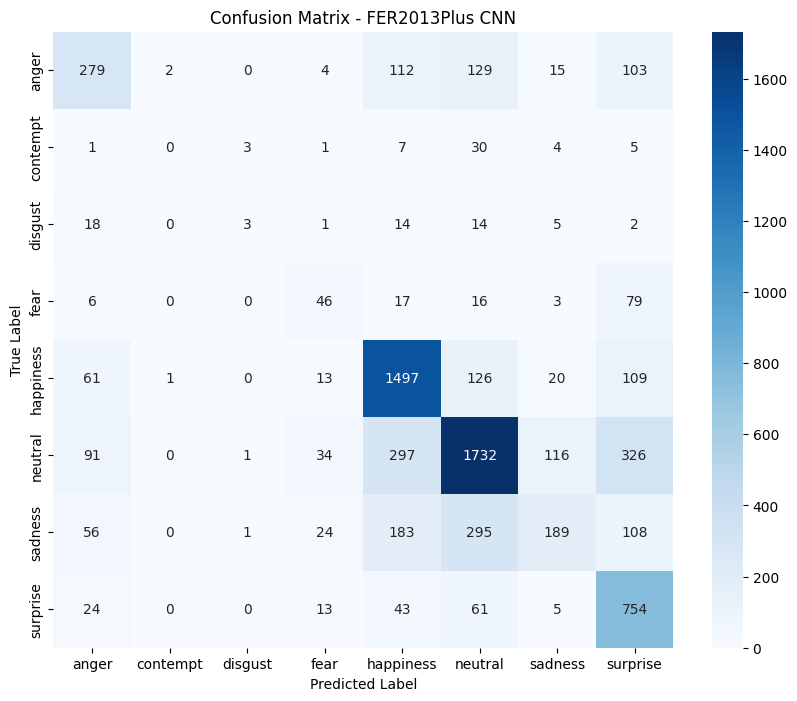

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - FER2013Plus CNN")
plt.show()

In [19]:
print("Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

Classification Report:

              precision    recall  f1-score   support

       anger       0.52      0.43      0.47       644
    contempt       0.00      0.00      0.00        51
     disgust       0.38      0.05      0.09        57
        fear       0.34      0.28      0.30       167
   happiness       0.69      0.82      0.75      1827
     neutral       0.72      0.67      0.69      2597
     sadness       0.53      0.22      0.31       856
    surprise       0.51      0.84      0.63       900

    accuracy                           0.63      7099
   macro avg       0.46      0.41      0.41      7099
weighted avg       0.63      0.63      0.61      7099



In [23]:
num_classes = len(class_names)

# Initialize arrays
class_correct = np.zeros(num_classes)
class_total = np.zeros(num_classes)

# Count correct predictions per class
for true_label, pred_label in zip(y_true, y_pred):
    class_total[true_label] += 1
    if true_label == pred_label:
        class_correct[true_label] += 1

# Accuracy per class
class_accuracy = class_correct / class_total

In [24]:
print("Per-Class Accuracy:\n")
for i, acc in enumerate(class_accuracy):
    print(f"{class_names[i]:<12}: {acc:.4f}")

Per-Class Accuracy:

anger       : 0.4332
contempt    : 0.0000
disgust     : 0.0526
fear        : 0.2754
happiness   : 0.8194
neutral     : 0.6669
sadness     : 0.2208
surprise    : 0.8378


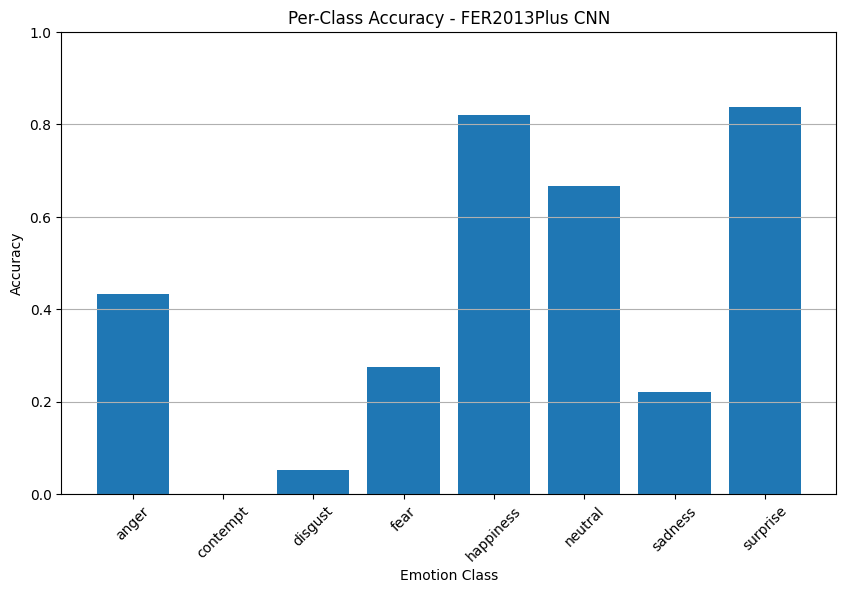

In [25]:
plt.figure(figsize=(10,6))
plt.bar(class_names, class_accuracy)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Emotion Class")
plt.title("Per-Class Accuracy - FER2013Plus CNN")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()